# Large Dataset Experiments - CNN vs Vision Transformer

This notebook runs experiments comparing CNN (ResNet) and Vision Transformer (ViT) on the coyo-labeled-300m dataset.

Given the dataset contains 300 million images, we can sample different sizes to test the performance of both architectures.

**Recommended sample sizes:**
- **1M samples**: Good for quick testing and validation (~2-4 hours on Colab)
- **5M samples**: Medium-scale experiment (~8-12 hours on Colab)
- **10M samples**: Large-scale experiment (~16-24 hours on Colab)
- **50M+ samples**: Very large-scale (may require multiple days or distributed setup)

**Note:** The default in Step 4 uses 1M samples for faster iteration. Adjust `--max_samples` based on your computational resources.

## Step 1: Setup and Install Dependencies

In [11]:
# Install required packages
!pip install torch torchvision torchmetrics pyyaml matplotlib seaborn scikit-learn numpy datasets -q

## Step 2: Upload Project Files

You have two options:

### Option A: Upload files directly (if you have the files locally)
1. Upload `CNN.py`, `VisionTransormer.py`, `config.yaml` to the root directory
2. Upload all files from `large-dataset/` folder

### Option B: Clone from GitHub (if your project is on GitHub)
Uncomment and modify the cell below:

## Step 3: Verify File Structure

Check that all necessary files are present:

In [13]:
import os

# Check for required files (notebook is inside `large-dataset`)
# So model/config files are one level up, and local experiment files are in this folder.
required_files = [
    'CNN.py',
    'VisionTransormer.py',
    'config.yaml',
    'large-dataset/evaluate.py',
    'large-dataset/load_coyo_dataset.py',
    'large-dataset/run_large_dataset_experiment.py'
]

print("Checking required files...")
for file in required_files:
    if os.path.exists(file):
        print(f"✓ {file}")
    else:
        print(f"✗ {file} - MISSING!")

print("\nFile check complete!")

Checking required files...
✗ CNN.py - MISSING!
✗ VisionTransormer.py - MISSING!
✗ config.yaml - MISSING!
✗ large-dataset/evaluate.py - MISSING!
✗ large-dataset/load_coyo_dataset.py - MISSING!
✗ large-dataset/run_large_dataset_experiment.py - MISSING!

File check complete!


## Step 4: Run Large Dataset Experiment

Run the experiment on coyo-labeled-300m dataset with 100 million sampled images:

In [ ]:
import sys
import os

# Change to large-dataset directory
# os.chdir('large-dataset')

# Run with Coyo-labeled-300m dataset
# Default: Sample 1 million images (adjustable - see Step 5 for other sizes)
# Test both CNN (ResNet) and Vision Transformer architectures
!python run_large_dataset_experiment.py \
    --dataset coyo \
    --num_epochs 10 \
    --max_samples 100000 \
    --num_classes 1000 \
    --config ../config.yaml \
    --output_dir ./results

Using device: cuda

Loading coyo dataset...
Loading Coyo-labeled-300m dataset (max_samples=100000, num_classes=1000)...
Note: This may take a while. Images are downloaded on-demand.
Loading Coyo-labeled-300m dataset from Hugging Face...
Note: This may take a while for the first time as metadata is downloaded.
Loading dataset from Hugging Face...
Using streaming mode (max_samples=100000 is small, avoids full dataset download)...
Resolving data files: 100% 128/128 [00:00<00:00, 1089.71it/s]
Loaded in streaming mode
Processing Coyo-labeled-300m dataset (max_samples=100000)...
Dataset size unknown (streaming mode)
Analyzing label distribution (max_samples=100000)...

DEBUG: First example structure:
  Keys: ['id', 'url', 'imagehash', 'labels', 'label_probs', 'width', 'height']
  Sample data (first 200 chars): {'id': 315, 'url': 'https://a.1stdibscdn.com/pair-of-blue-and-white-table-lamps-for-sale/1121189/f_121556431538206028457/12155643_master.jpg?width=240', 'imagehash': 'daf5a50aae4aa54a'

## Step 5: Run with Custom Parameters

You can customize the experiment parameters:

In [ ]:
# Example 1: Quick test with 1M samples (recommended for first run)
# !python run_large_dataset_experiment.py \
#     --dataset coyo \
#     --num_epochs 10 \
#     --max_samples 1000000 \
#     --num_classes 1000 \
#     --config ../config.yaml \
#     --output_dir ./results

# Example 2: Medium-scale experiment with 5M samples
# !python run_large_dataset_experiment.py \
#     --dataset coyo \
#     --num_epochs 10 \
#     --max_samples 5000000 \
#     --num_classes 1000 \
#     --config ../config.yaml \
#     --output_dir ./results

# Example 3: Large-scale experiment with 10M samples
# !python run_large_dataset_experiment.py \
#     --dataset coyo \
#     --num_epochs 10 \
#     --max_samples 10000000 \
#     --num_classes 1000 \
#     --config ../config.yaml \
#     --output_dir ./results

# Example 4: More epochs for better convergence
# !python run_large_dataset_experiment.py \
#     --dataset coyo \
#     --num_epochs 20 \
#     --max_samples 1000000 \
#     --num_classes 1000 \
#     --config ../config.yaml \
#     --output_dir ./results

# Example 5: Different number of classes (e.g., top 500 classes)
# !python run_large_dataset_experiment.py \
#     --dataset coyo \
#     --num_epochs 10 \
#     --max_samples 1000000 \
#     --num_classes 500 \
#     --config ../config.yaml \
#     --output_dir ./results

## Step 6: View Results

Display the generated plots and results:

Latest experiment: results/large_dataset_coyo_20251207_232218

Experiment Results (Overall Metrics):
Metric                    CNN             ViT            
------------------------------------------------------------
Accuracy                   13.64%        9.09%
F1-Score (Macro)          0.0402      0.0308
F1-Score (Weighted)       0.0717      0.0559
Test Loss                 0.1034      0.1070

Displaying training curves:


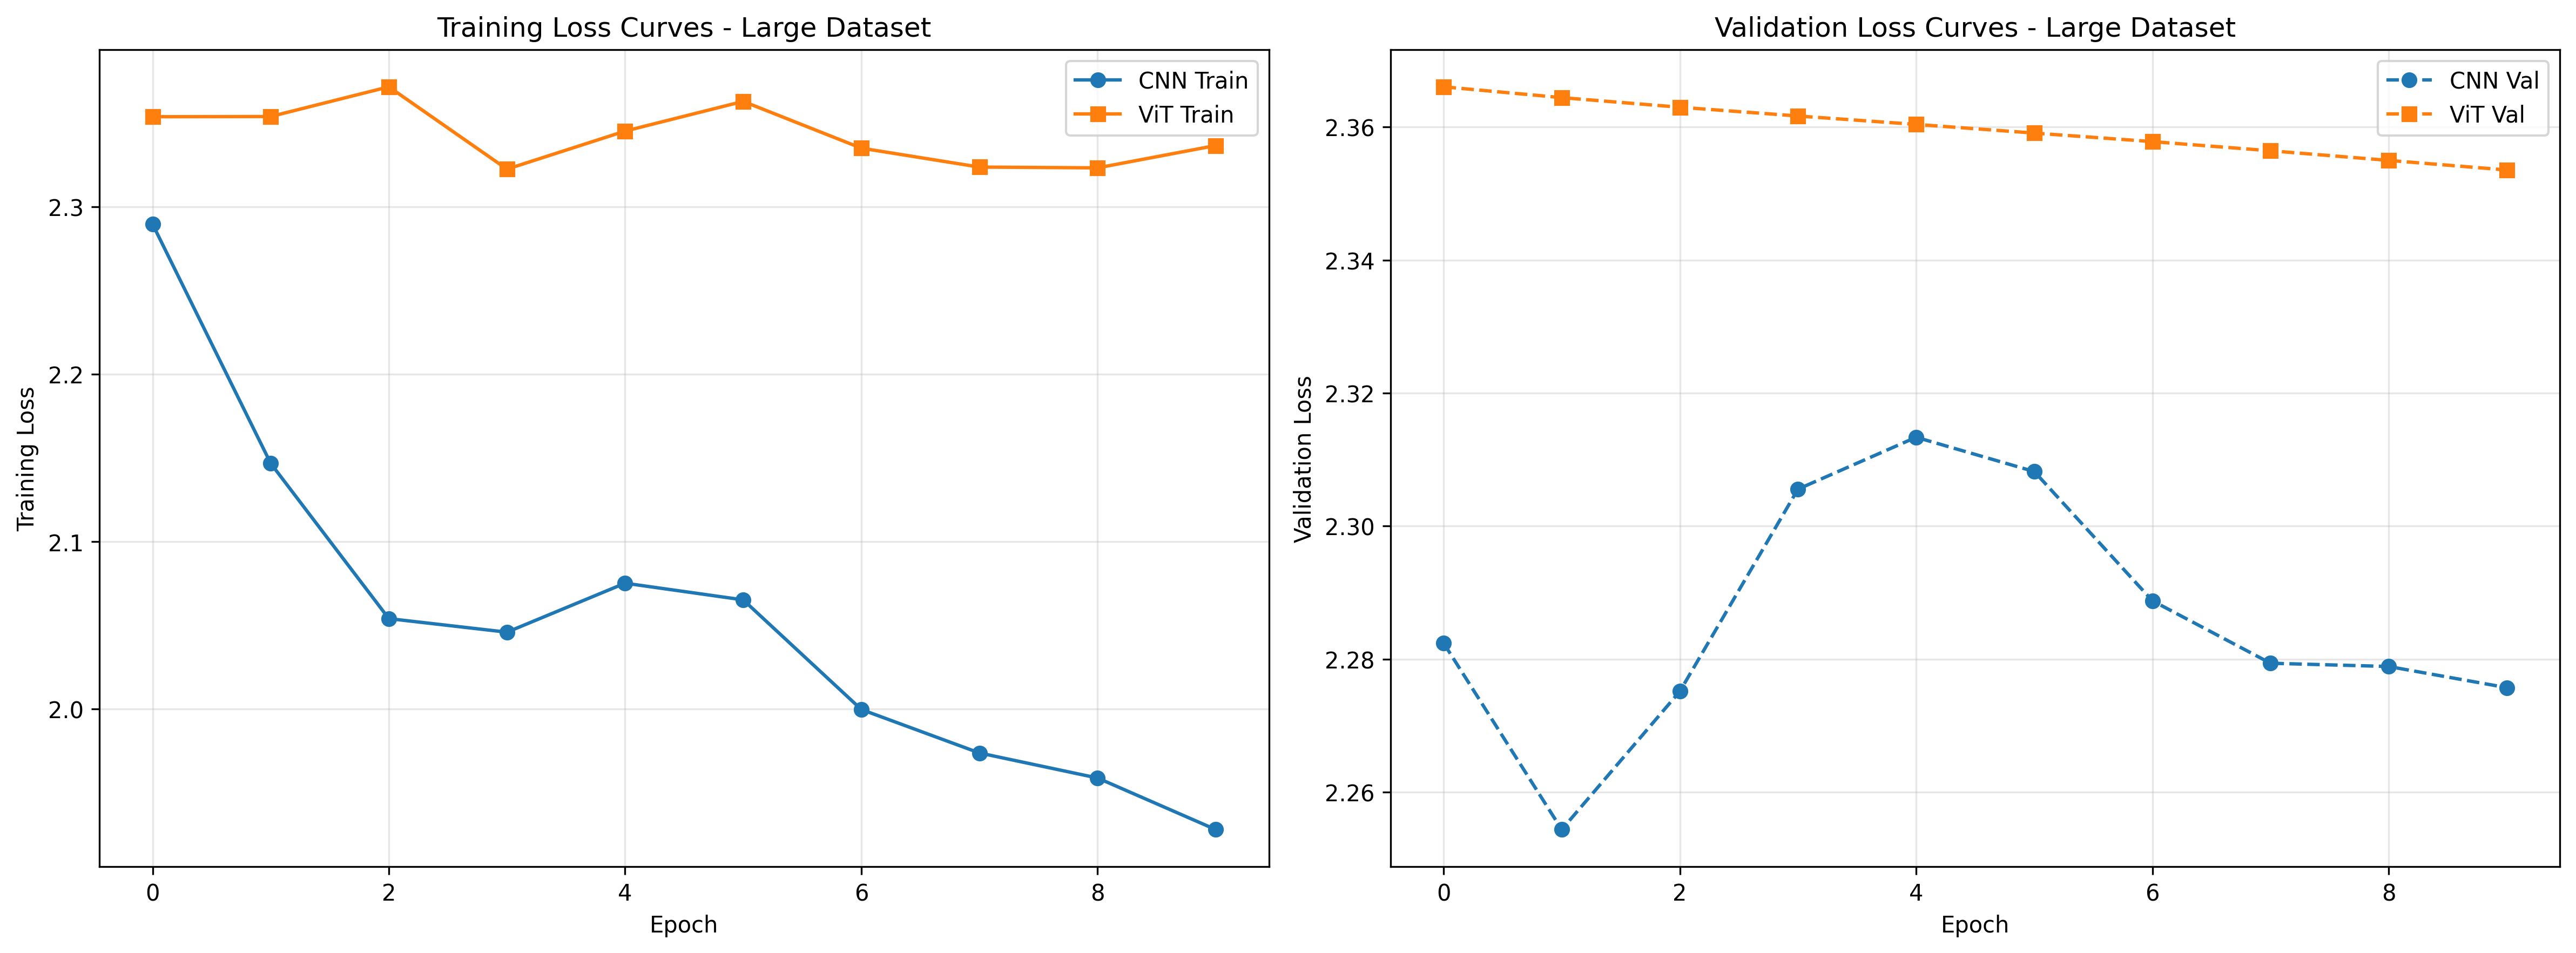

In [8]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob
import json

# Find the most recent experiment directory
result_dirs = sorted(glob.glob('results/large_dataset_*'), key=os.path.getmtime, reverse=True)
if result_dirs:
    latest_dir = result_dirs[0]
    print(f"Latest experiment: {latest_dir}")

    # Display results JSON
    if os.path.exists(f"{latest_dir}/results.json"):
        with open(f"{latest_dir}/results.json", 'r') as f:
            results = json.load(f)
        print("\nExperiment Results (Overall Metrics):")
        print(f"{'Metric':<25} {'CNN':<15} {'ViT':<15}")
        print("-" * 60)
        print(f"{'Accuracy':<25} {results['cnn_metrics']['accuracy']*100:>6.2f}%      {results['vit_metrics']['accuracy']*100:>6.2f}%")
        print(f"{'F1-Score (Macro)':<25} {results['cnn_metrics']['f1_macro']:>6.4f}      {results['vit_metrics']['f1_macro']:>6.4f}")
        print(f"{'F1-Score (Weighted)':<25} {results['cnn_metrics']['f1_weighted']:>6.4f}      {results['vit_metrics']['f1_weighted']:>6.4f}")
        print(f"{'Test Loss':<25} {results['cnn_metrics']['test_loss']:>6.4f}      {results['vit_metrics']['test_loss']:>6.4f}")

    # Display training curves plot
    charts_dir = os.path.join(latest_dir, 'charts')
    plot_path = os.path.join(charts_dir, 'training_curves.png')
    if os.path.exists(plot_path):
        print(f"\nDisplaying training curves:")
        display(Image(plot_path))
    else:
        print(f"Training curves not found: {plot_path}")
else:
    print("No experiment results found. Run the experiment first.")